IMPORTACION DE LIBRERIAS

In [280]:
import pandas as  pd
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from sklearn.model_selection import train_test_split

%matplotlib inline


LECTURA DEL DATASET

In [281]:


# Leer archivo Excel
data = pd.read_csv('./Dry_Bean_Dataset.csv')



data.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

PRE PROCESAMIENTO DEL DATASET      


In [283]:
# Mostrar valores únicos
print(data['Class'].unique())

# Contar cuántas veces aparece cada valor
print(data['Class'].value_counts())

print(data.value_counts())


['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64
Area    Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  Eccentricity  ConvexArea  EquivDiameter  Extent    Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class 
33518   702.956    277.571399       154.305581       1.798842      0.831240      34023       206.582775     0.808383  0.985157  0.852377   0.744251     0.008281      0.001567      0.553909      0.996396      HOROZ     2
43746   836.693    339.352567       165.411442       2.051566      0.873161      44442       236.006646     0.713778  0.984339  0.785264   0.695462     0.007757      0.001119      0.483667      0.992274      HOROZ     2
42156   815.245    335.198243       160.936938       2.082792      0.877200      42586       231.677980     0.834046  0.989903  0.7

In [284]:
mapping = {
    'DERMASON': 0,
    'SIRA': 1,
    'SEKER': 2,
    'HOROZ': 3,
    'CALI': 4,
    'BARBUNYA': 5,
    'BOMBAY': 6
}

data['Class_num'] = data['Class'].map(mapping)
print(data[['Class', 'Class_num']].head())

   Class  Class_num
0  SEKER          2
1  SEKER          2
2  SEKER          2
3  SEKER          2
4  SEKER          2


In [285]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_num
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,2
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,2
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,2
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,2
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,2


DIVICION DEL DATASET EN DATOS DE ENTRENAMIENTO Y PRUEBA , DE MANERA BALANCEADA

In [286]:
X=data.drop(columns=["Class", "Class_num"]).values
y = data['Class_num'].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,  
    stratify=y       
)

print("Tamaño train:", X_train.shape, y_train.shape)
print("Tamaño test:", X_test.shape, y_test.shape)

print("Distribución clases en train:")
print(pd.Series(y_train).value_counts(normalize=True))

print("Distribución clases en test:")
print(pd.Series(y_test).value_counts(normalize=True))

Tamaño train: (10888, 16) (10888,)
Tamaño test: (2723, 16) (2723,)
Distribución clases en train:
0    0.260562
1    0.193699
2    0.148880
3    0.141624
4    0.119765
5    0.097079
6    0.038391
Name: proportion, dtype: float64
Distribución clases en test:
0    0.260375
1    0.193537
2    0.149100
3    0.141755
4    0.119721
5    0.097319
6    0.038193
Name: proportion, dtype: float64


In [287]:
X =X_train
y=y_train


m= y.size

input_layer_size = X.shape[1]  
num_labels = len(np.unique(y))


# Ejemplo: imprimir primera fila de X y todo el vector y
print("Primera fila de X (features):")
print(X[0, :])   # todas las características del primer ejemplo

print("\nVector y (etiquetas):")
print(y)    



Primera fila de X (features):
[5.24170000e+04 9.03773000e+02 3.69666729e+02 1.81151959e+02
 2.04064439e+00 8.71699224e-01 5.30960000e+04 2.58339693e+02
 7.24151746e-01 9.87211843e-01 8.06423731e-01 6.98844861e-01
 7.05242056e-03 1.03762653e-03 4.88384139e-01 9.96618352e-01]

Vector y (etiquetas):
[3 3 1 ... 4 1 2]


NORMALIZACION DE LOS DATOS

In [288]:
def featureNormalize(X):
    X_norm=X.copy()
    mu=np.zeros(X.shape[1])
    sigma=np.zeros(X.shape[1])
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X,axis=0)
    X_norm=(X-mu)/sigma

    return X_norm, mu,sigma

In [289]:

X_norm, mu, sigma = featureNormalize(X)

In [290]:
print(X[0, :]) 
print(y)

[5.24170000e+04 9.03773000e+02 3.69666729e+02 1.81151959e+02
 2.04064439e+00 8.71699224e-01 5.30960000e+04 2.58339693e+02
 7.24151746e-01 9.87211843e-01 8.06423731e-01 6.98844861e-01
 7.05242056e-03 1.03762653e-03 4.88384139e-01 9.96618352e-01]
[3 3 1 ... 4 1 2]


In [291]:
m, n = X.shape
X = X_norm

FUCION SIGMOIDE

In [292]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

CALCULO DEL COSTO Y DECENSO GRADIENTE MANUAL

In [293]:
def calcularCosto(theta, X, y):
    
    m = y.size

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [294]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

FUNCION DE COSTO REGULARIZADA

  devuelve el costo J como tambien el gradiente

In [295]:
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    theta = theta.astype(float)
    X = X.astype(float)
    y = y.astype(float)

    h = sigmoid(X.dot(theta.T))
    temp = theta.copy()
    temp[0] = 0

    epsilon = 1e-5
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon))) \
        + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X) + (lambda_ / m) * temp

    return J, grad


CLASIFICACION ONE VS ALL

In [296]:
def OneVsAll(X, y, num_labels, lambda_):
  alpha = 0.01
  num_iters = 5000

  m, n = X.shape
  all_theta = np.zeros((num_labels, n + 1))

  # Agrega unos a la matriz X
  X = np.concatenate([np.ones((m, 1)), X], axis=1)

  for c in np.arange(num_labels):
      initial_theta = np.zeros(n + 1)

      y_actual = np.where(y == c, 1, 0)

      theta, J_history = descensoGradiente(initial_theta, X, y_actual, alpha, num_iters)

      all_theta[c] = theta
      # Grafica la convergencia del costo
      pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
      pyplot.xlabel('Numero de iteraciones')
      pyplot.ylabel('Costo J')

  return all_theta

(7, 17)


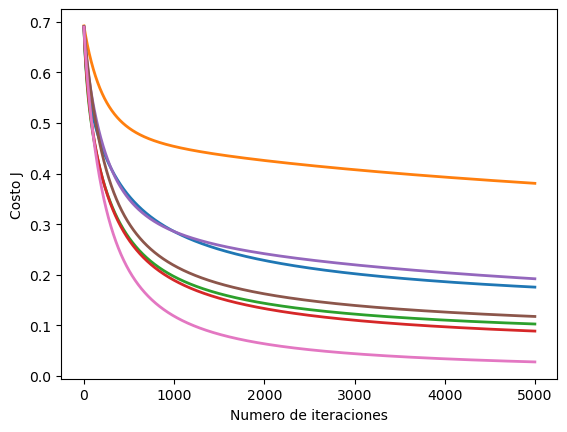

In [297]:
lambda_ = 0.1
all_theta = OneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)

PREDICCION DE ENTRENAMIENTO Y PRUEVA DE ONE VS ALL

In [ ]:
def predictOneVsAll(all_theta, X):
    

    m = X.shape[0]
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [298]:
# Primero imprimimos el tamaño del test
print("Shape de X_test:", X_test.shape)

# Normalizamos X_test con los mismos parámetros del train
X_test_norm = (X_test - mu) / sigma  

# Predicción sobre train (para referencia)
pred_train = predictOneVsAll(all_theta, X)
print('Precisión en el conjunto de entrenamiento: {:.2f}%'.format(np.mean(pred_train == y) * 100))

# Predicción sobre test
pred_test = predictOneVsAll(all_theta, X_test_norm)
print('Precisión en el conjunto de prueba: {:.2f}%'.format(np.mean(pred_test == y_test) * 100))


print("\nPredicciones (primeros 20 ejemplos test):")
print(pred_test[:20])
print("Reales:")
print(y_test[:20])


Shape de X_test: (2723, 16)
Precisión en el conjunto de entrenamiento: 89.36%
Precisión en el conjunto de prueba: 87.84%

Predicciones (primeros 20 ejemplos test):
[1 1 3 6 3 0 1 0 4 1 0 0 0 3 0 1 1 0 2 0]
Reales:
[1 1 3 6 3 0 1 0 4 4 1 0 0 3 0 2 1 0 2 0]


CLASIFICACION ONE VS ALL CON USO DE

In [299]:
def OneVsAllOM(X, y, num_labels, lambda_):
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 10}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x


    return all_theta

In [300]:
lambda_ = 0.1
all_thetaom = OneVsAllOM(X, y, num_labels, lambda_)
print(all_thetaom.shape)
print(all_thetaom)

(7, 17)
[[-6.95453584e+00 -6.44822896e-01 -1.59907048e+00 -1.74359503e+00
  -1.28013393e+00 -2.46960894e+00  3.68334906e+00 -6.38987044e-01
  -1.38412623e+00 -5.00989817e-01 -5.86994386e-01  2.35517290e+00
   2.52759266e-01  2.54565955e+00  3.07930901e-01 -5.62609938e-01
   1.05510526e+00]
 [-2.56297293e+00 -1.69785063e+00 -1.17988877e+00 -1.49263447e+00
  -1.94090832e-01 -2.21543913e+00  2.66102484e+00 -1.70988543e+00
  -7.13967330e-01 -7.21226988e-02  1.01694057e-01  1.12089896e+00
   1.24104922e-01 -2.86632323e+00 -3.18158260e+00 -5.66235713e-01
  -1.71707960e-01]
 [-5.92965900e+00 -8.76163035e-01 -1.70182406e-01 -7.34990757e-02
  -2.33748749e-02 -9.54509106e-02 -1.80020408e+00 -8.80246222e-01
  -1.05506403e-01 -3.61304927e-01  1.16289021e+00  4.30869119e-01
   7.84242477e-01 -2.27302698e+00 -1.00981809e-01  1.01824487e+00
   1.33265504e+00]
 [-7.12003872e+00 -7.60694807e-01 -2.37363434e-01  1.80387121e-01
  -8.73682739e-01  2.12536446e+00  1.68453488e-01 -7.70126603e-01
  -4.054078

In [302]:

print("Shape de X_test:", X_test.shape)


X_test_norm = (X_test - mu) / sigma  


pred_train = predictOneVsAll(all_thetaom, X)
print('Precisión en el conjunto de entrenamiento: {:.2f}%'.format(np.mean(pred_train == y) * 100))

pred_test = predictOneVsAll(all_thetaom, X_test_norm)
print('Precisión en el conjunto de prueba: {:.2f}%'.format(np.mean(pred_test == y_test) * 100))


print("\nPredicciones (primeros 20 ejemplos test):")
print(pred_test[:20])
print("Reales:")
print(y_test[:20])


Shape de X_test: (2723, 16)
Precisión en el conjunto de entrenamiento: 91.54%
Precisión en el conjunto de prueba: 89.46%

Predicciones (primeros 20 ejemplos test):
[1 1 3 6 3 0 1 0 4 4 0 0 0 3 1 1 4 0 2 0]
Reales:
[1 1 3 6 3 0 1 0 4 4 1 0 0 3 0 2 1 0 2 0]
